<a href="https://colab.research.google.com/github/Hemalatha-Karuppusamy/Industrial_copper_modelling_using_ML/blob/main/Copper_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df = pd.read_csv("/content/Copper_SetP.csv",encoding = 'unicode_escape')

<ipython-input-3-d6ef4cef5ff0>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_SetP.csv",encoding = 'unicode_escape')


In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# Data Classification

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
#Categorical - country,status,item type,application,material_ref,product_ref
#Regression - quantity tons,thickness,width,selling_price

# Pre-processing

In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
#Estimating the number of days took to deliever.
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery_date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['no_of_days'] = (df['delivery_date'] - df['item_date']).dt.days
#Logically verifying the no of days.
df.query("no_of_days < 0").count()

id               16107
item_date        16107
quantity tons    16107
customer         16107
country          16107
status           16107
item type        16107
application      16107
thickness        16107
width            16107
material_ref     10650
product_ref      16107
delivery date    16107
selling_price    16107
delivery_date    16107
no_of_days       16107
dtype: int64

In [ ]:
#Removing the negative values which  is logically impossible
df.drop(df[df['no_of_days'] < 0].index, inplace=True)

In [ ]:
#Deleting the unwanted Columns for prediction.
df.drop(['id','item_date','material_ref','delivery date','delivery_date'],axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165566 entries, 0 to 181531
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  165566 non-null  object 
 1   customer       165565 non-null  float64
 2   country        165538 non-null  float64
 3   status         165564 non-null  object 
 4   item type      165566 non-null  object 
 5   application    165542 non-null  float64
 6   thickness      165565 non-null  float64
 7   width          165566 non-null  float64
 8   product_ref    165566 non-null  int64  
 9   selling_price  165565 non-null  float64
 10  no_of_days     165560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.2+ MB


In [ ]:
df.shape

(165566, 11)

In [ ]:
#Pre-processing the columns as required
df['country'] = pd.to_numeric(df['country'],errors = "coerce")
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors = "coerce")
#Filtering the status values other than "Won and Lost"
df.query("status == 'Won' or status == 'Lost'", inplace =True)

In [ ]:
df.shape

(135792, 11)

In [ ]:
df.isna().sum()

quantity tons    1
customer         1
country          4
status           0
item type        0
application      3
thickness        0
width            0
product_ref      0
selling_price    1
no_of_days       5
dtype: int64

In [ ]:
df.dropna(how ='any',inplace = True)

In [ ]:
df.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
no_of_days       0
dtype: int64

In [ ]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,no_of_days
count,135780.000000,1.357800e+05,135780.000000,135780.000000,135780.000000,135780.000000,1.357800e+05,135780.000000,135780.000000
mean,92.682478,3.023404e+07,46.018928,24.355295,2.690494,1304.821651,4.840361e+08,831.472153,66.213271
std,420.903151,1.085416e+05,24.665364,17.465256,7.445614,266.780291,7.210107e+08,203.431487,39.261639
min,-4.000000,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000,0.000000
25%,10.925203,3.019722e+07,26.000000,10.000000,0.750000,1180.000000,6.283770e+05,678.000000,31.000000
50%,30.029695,3.020531e+07,32.000000,15.000000,1.500000,1250.000000,6.406650e+05,816.000000,63.000000
75%,64.175624,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,956.000000,99.000000
max,70252.363070,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,10913.000000,448.000000


In [ ]:
df.rename(columns = {'quantity tons':'quantity_tons'}, inplace = True)

In [ ]:
df.query("selling_price < 0").count(),df.query("quantity_tons < 0").count()

(quantity_tons    4
 customer         4
 country          4
 status           4
 item type        4
 application      4
 thickness        4
 width            4
 product_ref      4
 selling_price    4
 no_of_days       4
 dtype: int64,
 quantity_tons    1
 customer         1
 country          1
 status           1
 item type        1
 application      1
 thickness        1
 width            1
 product_ref      1
 selling_price    1
 no_of_days       1
 dtype: int64)

In [ ]:
#Dropping the negative values as the selling price cant be in negative values
df.drop(df[df['selling_price'] < 0].index, inplace=True)
df.drop(df[df['quantity_tons'] < 0].index, inplace=True)

In [ ]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price,no_of_days
count,135775.000000,1.357750e+05,135775.000000,135775.000000,135775.000000,135775.000000,1.357750e+05,135775.000000,135775.000000
mean,92.684315,3.023405e+07,46.019208,24.355065,2.690519,1304.823250,4.840180e+08,831.517120,66.213905
std,420.910694,1.085431e+05,24.665477,17.465365,7.445740,266.783883,7.210036e+08,203.264847,39.261891
min,0.000010,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,0.000000,0.000000
25%,10.925655,3.019722e+07,26.000000,10.000000,0.750000,1180.000000,6.283770e+05,678.000000,31.000000
50%,30.029704,3.020531e+07,32.000000,15.000000,1.500000,1250.000000,6.406650e+05,816.000000,63.000000
75%,64.174115,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,956.000000,99.000000
max,70252.363070,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,10913.000000,448.000000


# Outlier Detection and Correction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Thickness')

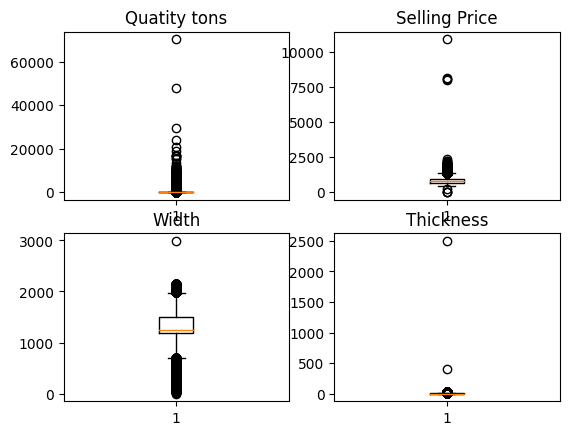

In [ ]:
plt.subplot2grid((2,2),(0,0))
plt.boxplot(df['quantity_tons'])
plt.title("Quatity tons")
plt.subplot2grid((2,2),(0,1))
plt.boxplot(df['selling_price'])
plt.title("Selling Price")
plt.subplot2grid((2,2),(1,0))
plt.boxplot(df['width'])
plt.title("Width")
plt.subplot2grid((2,2),(1,1))
plt.boxplot(df['thickness'])
plt.title("Thickness")

In [ ]:
#A function to detect outliers
def detect_outliers_iqr(data):
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for i in data:
      if (i<lwr_bound or i>upr_bound):
          df.drop(df[df['quantity_tons']==i].index, inplace=True)

detect_outliers_iqr(df['quantity_tons'])

In [ ]:
def detect_outliers_iqr(data):
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for i in data:
      if (i<lwr_bound or i>upr_bound):
          df.drop(df[df['thickness']==i].index, inplace=True)

detect_outliers_iqr(df['thickness'])

In [ ]:
def detect_outliers_iqr(data):
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for i in data:
      if (i<lwr_bound or i>upr_bound):
          df.drop(df[df['width']==i].index, inplace=True)

detect_outliers_iqr(df['width'])

def detect_outliers_iqr(data):
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for i in data:
      if (i<lwr_bound or i>upr_bound):
          df.drop(df[df['selling_price']==i].index, inplace=True)

detect_outliers_iqr(df['selling_price'])

Text(0.5, 1.0, 'Thickness')

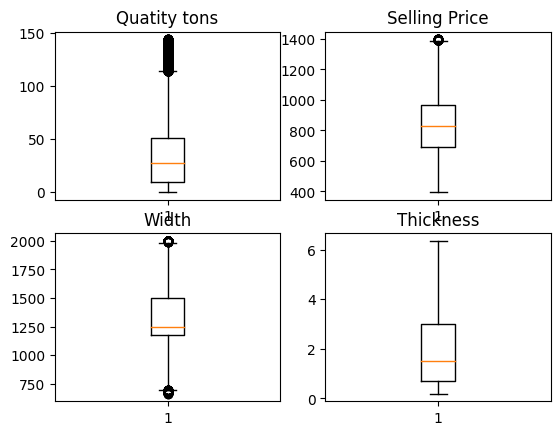

In [ ]:
plt.subplot2grid((2,2),(0,0))
plt.boxplot(df['quantity_tons'])
plt.title("Quatity tons")
plt.subplot2grid((2,2),(0,1))
plt.boxplot(df['selling_price'])
plt.title("Selling Price")
plt.subplot2grid((2,2),(1,0))
plt.boxplot(df['width'])
plt.title("Width")
plt.subplot2grid((2,2),(1,1))
plt.boxplot(df['thickness'])
plt.title("Thickness")

# Skewness rectification

In [ ]:
import seaborn as sns

<ipython-input-30-cb4a388bf54a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity_tons'])
<ipython-input-30-cb4a388bf54a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])
<ipython-input-30-cb4a388bf54a>:8: UserWarning: 

`distplot` is a deprecated function and wi

Text(0.5, 1.0, 'Thickness')

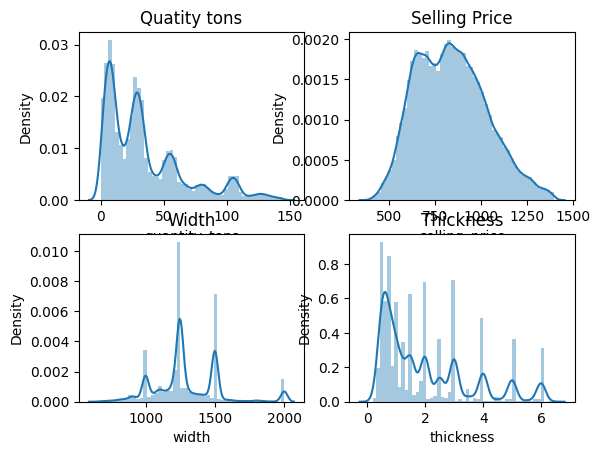

In [ ]:
plt.subplot2grid((2,2),(0,0))
sns.distplot(df['quantity_tons'])
plt.title("Quatity tons")
plt.subplot2grid((2,2),(0,1))
sns.distplot(df['selling_price'])
plt.title("Selling Price")
plt.subplot2grid((2,2),(1,0))
sns.distplot(df['width'])
plt.title("Width")
plt.subplot2grid((2,2),(1,1))
sns.distplot(df['thickness'])
plt.title("Thickness")

In [ ]:
col = ['selling_price','quantity_tons','width','thickness']
for i in col:
  print(df[i].skew(),'Positive Skew' if df[i].skew()>0 else 'Negative Skew')

0.36208443988986505 Positive Skew
1.2738502029723155 Positive Skew
0.8162949129822484 Positive Skew
1.1048508331624842 Positive Skew


In [ ]:
# if the Skew value lies between -1 to 1 its not required to treat unless and untill the buisness scope needs
# to treat right skew i'm using log-transform method
df['quantity_tons'] = np.log(df['quantity_tons'])
df['thickness'] = np.log(df['thickness'])

<ipython-input-33-cb4a388bf54a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity_tons'])
<ipython-input-33-cb4a388bf54a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])
<ipython-input-33-cb4a388bf54a>:8: UserWarning: 

`distplot` is a deprecated function and wi

Text(0.5, 1.0, 'Thickness')

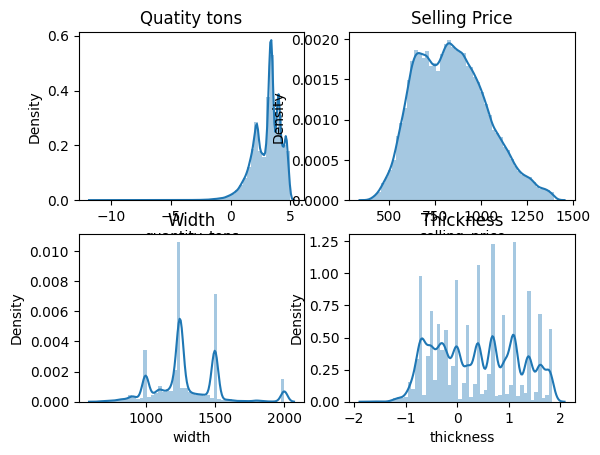

In [ ]:
plt.subplot2grid((2,2),(0,0))
sns.distplot(df['quantity_tons'])
plt.title("Quatity tons")
plt.subplot2grid((2,2),(0,1))
sns.distplot(df['selling_price'])
plt.title("Selling Price")
plt.subplot2grid((2,2),(1,0))
sns.distplot(df['width'])
plt.title("Width")
plt.subplot2grid((2,2),(1,1))
sns.distplot(df['thickness'])
plt.title("Thickness")

In [ ]:
col = ['selling_price','quantity_tons','width','thickness']
for i in col:
  print(df[i].skew(),'Positive Skew' if df[i].skew()>0 else 'Negative Skew')

0.36208443988986505 Positive Skew
-0.9492766081406113 Negative Skew
0.8162949129822484 Positive Skew
0.10198962336792834 Positive Skew


# Encoding of Categorical variables

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
cat_col = ["status","item type"]
for i in cat_col:
  print(df[i].unique())
  print("____________________")


['Won' 'Lost']
____________________
['W' 'S' 'Others' 'PL' 'WI' 'IPL']
____________________


In [ ]:
l_status = df['status'].unique().tolist()
l_item_type = df['item type'].unique().tolist()

In [ ]:
engine = OrdinalEncoder()

In [ ]:
cat_col = ["status","item type"]
for i in cat_col:
  df[i] = engine.fit_transform(df[[i]])

In [ ]:
l_status_ = df['status'].unique().tolist()
l_item_type_ = df['item type'].unique().tolist()

In [ ]:
l_item_type,l_item_type_

(['W', 'S', 'Others', 'PL', 'WI', 'IPL'], [4.0, 3.0, 1.0, 2.0, 5.0, 0.0])

In [ ]:
df.head()

,quantity_tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,no_of_days
0,3.991779,30156308.0,28.0,1.0,4.0,10.0,0.693147,1500.0,1670798778,854.00,91.0
8,4.235147,30341428.0,38.0,1.0,3.0,10.0,-0.510826,1275.0,1668701376,1363.00,91.0
12,3.314642,30165529.0,78.0,1.0,4.0,10.0,-0.287682,1250.0,164141591,1098.00,91.0
13,3.473063,30202362.0,27.0,1.0,3.0,10.0,-0.510826,1010.0,628377,973.00,91.0
16,4.319145,30153510.0,30.0,1.0,4.0,41.0,-0.519194,1265.0,611993,1161.86,0.0


# Correlation Visualisation

In [ ]:
#visualisation of correlation function
df.corr()

,quantity_tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,no_of_days
quantity_tons,1.000000,0.082681,-0.090972,-0.192874,-0.300925,0.044396,0.053282,0.064249,0.079965,-0.047930,0.122915
customer,0.082681,1.000000,0.067397,-0.049736,-0.066304,0.008488,0.034194,0.026789,-0.020358,0.006403,0.010478
country,-0.090972,0.067397,1.000000,0.117639,0.140225,-0.014977,-0.066735,0.038730,-0.150836,-0.041582,-0.284170
status,-0.192874,-0.049736,0.117639,1.000000,0.237868,0.151028,-0.129653,-0.103670,-0.089006,0.067468,-0.239945
item type,-0.300925,-0.066304,0.140225,0.237868,1.000000,0.144558,-0.084017,-0.074051,-0.096688,0.115943,-0.119866
application,0.044396,0.008488,-0.014977,0.151028,0.144558,1.000000,-0.210652,-0.166609,-0.143284,0.208318,-0.166897
thickness,0.053282,0.034194,-0.066735,-0.129653,-0.084017,-0.210652,1.000000,0.351966,0.310117,-0.482512,0.086049
width,0.064249,0.026789,0.038730,-0.103670,-0.074051,-0.166609,0.351966,1.000000,0.028262,-0.173705,0.031429
product_ref,0.079965,-0.020358,-0.150836,-0.089006,-0.096688,-0.143284,0.310117,0.028262,1.000000,-0.115839,0.175098
selling_price,-0.047930,0.006403,-0.041582,0.067468,0.115943,0.208318,-0.482512,-0.173705,-0.115839,1.000000,0.314214


<Axes: >

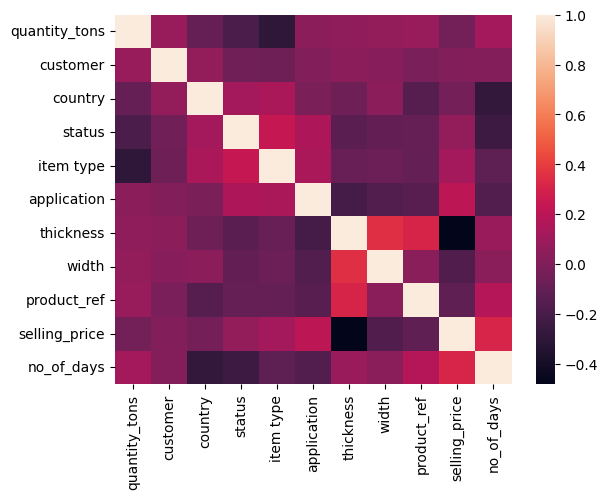

In [ ]:
sns.heatmap(data = df.corr())

In [ ]:
#saving the data
df.to_csv("Copper_final.csv")

# Training the model -  Predicting the selling price

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
y = df['selling_price']
x = df.drop(["selling_price"],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=40)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40)

In [ ]:
y_pred = model.predict(x_test)

# R2 and MSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)

(0.906142394273452, 3429.7795159903176)

# Training the Classification Model

        

In [ ]:
x = df.drop(['status'], axis = 1)
y = df['status']

In [ ]:
y.value_counts()

1.0    82283
0.0    25002
Name: status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
ypred = model.predict(x_test)

# Confusion Matrix, Accuracy, Recall, Precision and F1 score

In [ ]:
from sklearn import metrics

metrics.confusion_matrix(y_test,ypred)

array([[ 4542,   378],
       [  427, 16110]])

In [ ]:
metrics.accuracy_score(y_test,ypred)

0.9624831057463765

In [ ]:
metrics.recall_score(y_test,ypred)

0.9741791135030538

In [ ]:
metrics.precision_score(y_test,ypred)

0.9770742358078602

In [ ]:
metrics.f1_score(y_test,ypred)

0.9756245268735806